In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

In [3]:
df = pd.read_csv("fcc-forum-pageviews.csv", index_col=0, parse_dates=["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [4]:
print(df.shape)
df.head()

(1304, 1)


,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [5]:
df = df[(df["value"] >= (df["value"].quantile(0.025))) & (df["value"] <= (df["value"].quantile(0.975)))]
print(df.shape)
df.head()

(1238, 1)


,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


Text(0, 0.5, 'Page Views')

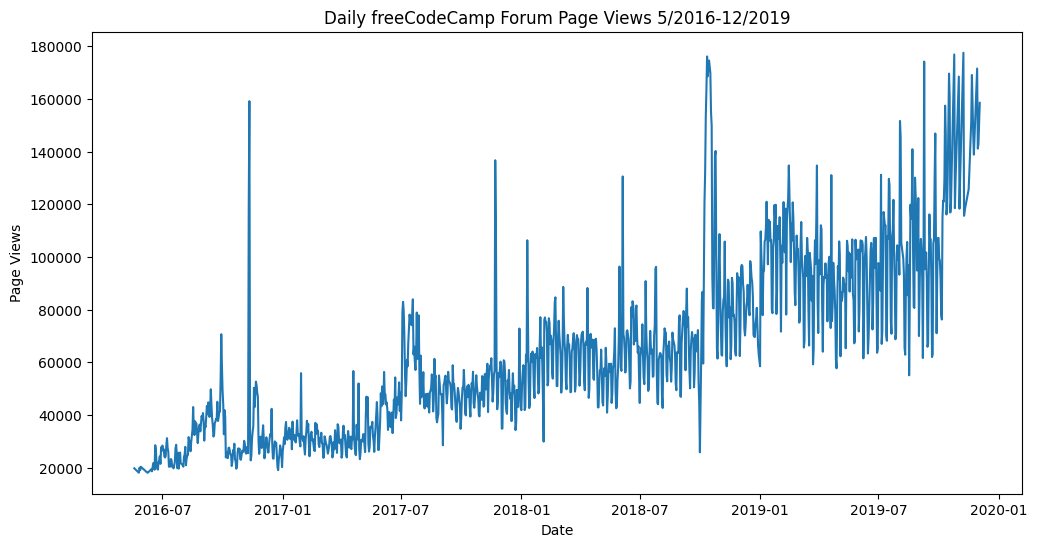

In [8]:
# LINE PLOT
line_df = df.copy()

plt.figure(figsize=(12,6))
plt.plot(line_df.index, line_df["value"])
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel("Date")
plt.ylabel("Page Views")

In [40]:
# BAR PLOT

bar_df = df.copy()
bar_df["year"] = df.index.year
bar_df["month"] = df.index.month
bar_df = bar_df.groupby(["year", "month"], as_index=False).agg({"value": pd.Series.mean})
bar_df.head()

,year,month,value
0,2016,5,19432.400000
1,2016,6,21875.105263
2,2016,7,24109.678571
3,2016,8,31049.193548
4,2016,9,41476.866667


Text(0, 0.5, 'Average Page Views')

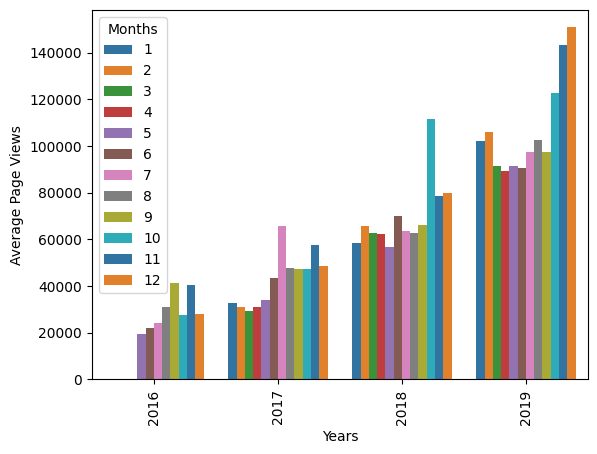

In [46]:
bar_plot = sns.barplot(data=bar_df, x="year", y="value", hue="month",
            palette="tab10")

plt.legend(title="Months")

plt.xlabel("Years")
plt.xticks(rotation=90)

plt.ylabel("Average Page Views")


In [47]:
# DRAW BOX PLOT 
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [48]:
df_box.head()

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May


Text(0, 0.5, 'Page Views')

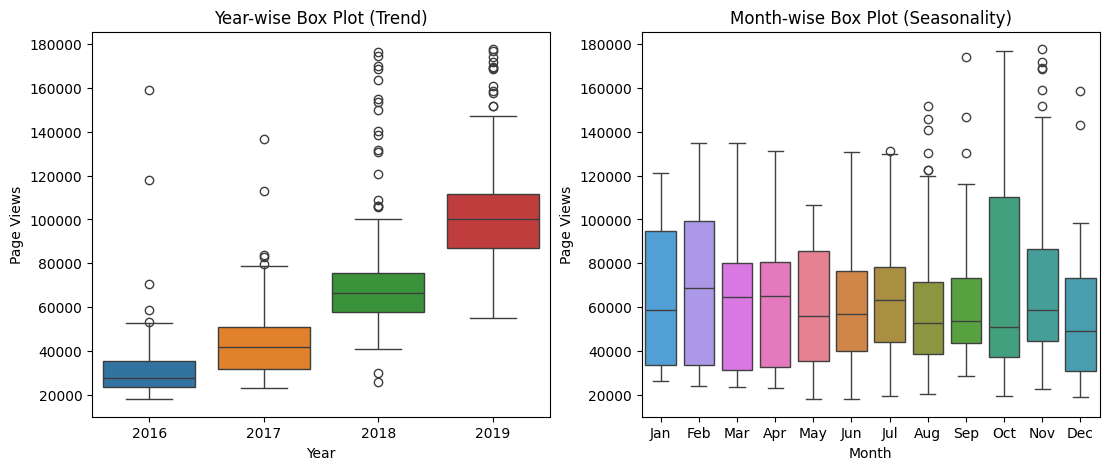

In [76]:
fig, (box_1, box_2) = plt.subplots(1,2, figsize=(13,5))

# FIRST PLOT
box_1 = sns.boxplot(data=df_box, 
                    x="year", y="value", 
                    hue="year", palette="tab10", 
                    legend=False, ax=box_1)

box_1.set_title("Year-wise Box Plot (Trend)")

box_1.set_xlabel("Year")
box_1.set_ylabel("Page Views")

# SECOND PLOT
box_2 = sns.boxplot(data=df_box,
                    x="month", y="value",
                    order=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
                    hue="month", palette="husl",
                    legend=False, ax=box_2)
box_2.set_title("Month-wise Box Plot (Seasonality)")
box_2.set_xlabel("Month")
box_2.set_ylabel("Page Views")
